# Algoritmo de clasificación de imágenes

In [ ]:
# Por tema credenciales, es mas facil hacer la descarga desde microsoft:
# https://download.microsoft.com/download/3/e/1/3e1c3f21-ecdb-4869-8368-6deba77b919f/kagglecatsanddogs_5340.zip


# 1. El data set es muy grande (mas de 700 MG)
# 2. Dentro de las imagenes hay errores, y esas imagenes no las vamos a poder procesar.
# 3. Estructura de carpetas: El dataset original tiene 2 carpetas, una para cat y otra para dog.
#    Debemos convertir el dataset a los clasicos dataset de aprendisaje, validacion y prueba.

# Entonces:

    # * Bajar el dataset a colab
    # * Descomprimirlo
    # * Crear carpetas para el dataset de entrenamiento, validacion y prueba
    # * Dentro de cada carpeta, crear una carpeta cat y otra dog
    # * Debemos extraer las imagenes de manera aleatoria
    # * Montarlas en las carpetas corerspondientes
    # * Generar que cada carpeta contenga la etiqueta (el resultado de la clasificacion: cat | dog) 
    #   y las imagenes

# Todo esto lo haremos utilizando dos herramientas: Python y Bash

![alt text](image.png)

In [ ]:
# Importar paquetes
import os 

import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing import image

import plotly.graph_objects as go
from PIL import Image
import tensorflow as tf

from sklearn.metrics import (
    accuracy_score,
    classification_report,
    ConfusionMatrixDisplay
)

def remove_file(path):                              # Funcion adhoc para borrar archivos con fallas.
  if os.path.exists(path):
    try:
      os.remove(path)
    except PermissionError:                         # En caso de error del sistema
      print(f'Permission denied to delete{path}')
    except OSError:                                 # En caso de error del sistema
      print(f'OS Error in {path}')

#  Esta funcion esta procesando los archivos por detras utilizando bash.

In [ ]:
# ◯ Paso 1: Importar librerías necesarias
import os
import tensorflow as tf

# ◯ Paso 2: Definir ruta local para descargar y extraer los datos
DATA_DIR = "/data"
os.makedirs(DATA_DIR, exist_ok=True)

# ◯ Paso 3: Definir la URL del dataset
URL = 'https://download.microsoft.com/download/3/e/1/3e1c3f21-ecdb-4869-8368-6deba77b919f/kagglecatsanddogs_5340.zip'

# ◯ Paso 4: Descargar y extraer el archivo zip
path_to_zip = tf.keras.utils.get_file(
    fname='cats_and_dogs.zip',
    origin=URL,
    extract=True,
    cache_dir=DATA_DIR
)

print(f'Dataset descargado en: {path_to_zip}')


824887076/824887076 ━━━━━━━━━━━━━━━━━━━━ 17s 0us/step
Dataset descargado en: ./data/raw/datasets/cats_and_dogs_extracted


In [26]:
!ls ./data/raw/datasets/cats_and_dogs_extracted/PetImages/Dog

0.jpg	   11604.jpg  1965.jpg	3572.jpg  518.jpg   6788.jpg  8395.jpg
1.jpg	   11605.jpg  1966.jpg	3573.jpg  5180.jpg  6789.jpg  8396.jpg
10.jpg	   11606.jpg  1967.jpg	3574.jpg  5181.jpg  679.jpg   8397.jpg
100.jpg    11607.jpg  1968.jpg	3575.jpg  5182.jpg  6790.jpg  8398.jpg
1000.jpg   11608.jpg  1969.jpg	3576.jpg  5183.jpg  6791.jpg  8399.jpg
10000.jpg  11609.jpg  197.jpg	3577.jpg  5184.jpg  6792.jpg  84.jpg
10001.jpg  1161.jpg   1970.jpg	3578.jpg  5185.jpg  6793.jpg  840.jpg
10002.jpg  11610.jpg  1971.jpg	3579.jpg  5186.jpg  6794.jpg  8400.jpg
10003.jpg  11611.jpg  1972.jpg	358.jpg   5187.jpg  6795.jpg  8401.jpg
10004.jpg  11612.jpg  1973.jpg	3580.jpg  5188.jpg  6796.jpg  8402.jpg
10005.jpg  11613.jpg  1974.jpg	3581.jpg  5189.jpg  6797.jpg  8403.jpg
10006.jpg  11614.jpg  1975.jpg	3582.jpg  519.jpg   6798.jpg  8404.jpg
10007.jpg  11615.jpg  1976.jpg	3583.jpg  5190.jpg  6799.jpg  8405.jpg
10008.jpg  11616.jpg  1977.jpg	3584.jpg  5191.jpg  68.jpg    8406.jpg
10009.jpg  11617.jpg  1978.jp

In [ ]:
Directorio Base:

basedir = './data/raw/datasets/cats_and_dogs_extracted/'

In [ ]:
# ◯ Borrado de Archivos con errores y thumbs.db
#    -----------------------------------------------------------------------------------

remove_file('./data/raw/datasets/cats_and_dogs_extracted/PetImages/Dog/11686.jpg')
remove_file('./data/raw/datasets/cats_and_dogs_extracted/PetImages/Dog/11702.jpg')
remove_file('./data/raw/datasets/cats_and_dogs_extracted/PetImages/Dog/Thumbs.db')
remove_file('./data/raw/datasets/cats_and_dogs_extracted/PetImages/Cat/835.jpg')
remove_file('./data/raw/datasets/cats_and_dogs_extracted/PetImages/Cat/666.jpg')
remove_file('./data/raw/datasets/cats_and_dogs_extracted/PetImages/Cat/Thumbs.db')

In [ ]:
# ◯ Definimos las Rutas Originales de las imagenes
#    -----------------------------------------------------------------------------------

original_cat_dir = os.path.join(DATA_DIR, './data/raw/datasets/cats_and_dogs_extracted/PetImages/Cat') 
original_dog_dir = os.path.join(DATA_DIR, './data/raw/datasets/cats_and_dogs_extracted/PetImages/Dog')

# ◯ Crearemos las carpetas train, val y test
#    -----------------------------------------------------------------------------------

os.makedirs('./data/raw/datasets/cats_and_dogs_extracted/train', exist_ok=True)
os.makedirs('./data/raw/datasets/cats_and_dogs_extracted/val', exist_ok=True)
os.makedirs('./data/raw/datasets/cats_and_dogs_extracted/test', exist_ok=True)


# ◯ Definimos las carpetas Cat y Dog dentro de cada carpeta de Train, Val y Test
#    -----------------------------------------------------------------------------------

os.makedirs('./data/raw/datasets/cats_and_dogs_extracted/train/cat', exist_ok=True)
os.makedirs('./data/raw/datasets/cats_and_dogs_extracted/train/dog', exist_ok=True)
os.makedirs('./data/raw/datasets/cats_and_dogs_extracted/val/cat', exist_ok=True)
os.makedirs('./data/raw/datasets/cats_and_dogs_extracted/val/dog', exist_ok=True)
os.makedirs('./data/raw/datasets/cats_and_dogs_extracted/test/cat', exist_ok=True)
os.makedirs('./data/raw/datasets/cats_and_dogs_extracted/test/dog', exist_ok=True)

In [28]:
# ◯ Pasaremos de forma aleatoria los archivos a las carpetas correspondientes 
#    -----------------------------------------------------------------------------------

# Para esto definiremos una funcion adhoc usando las librerias de shutil y random

import shutil # para pasar los archivos entre carpetas
import random # Para seleccionar los archivos de forma aleatoria

def split_data(source_dir, train_dir, val_dir, test_dir, split_size=0.75): # 75% ira a train, 12.5% ira a val, 12.5% ira a test
  files = os.listdir(source_dir)              # Lista todos los archivos en la carpeta y los guarda en una lista
  random.shuffle(files, random.random(2025))  # Mezcla la lista de archivos de forma aleatoria
  
  train_point = int(len(files)*split_size)    # Calculamos la cantidad de elementos de una lista y lo multiplicamos por 75%, pasando a int el conteo asegurandome de que el resultado sea un numero sin decimales, para poder hacer el split sin errores. 
  test_val_point = int(len(files)*(1-split_size)) # idem para test y val
 
  train_file = files[:train_point]
  val_file = files[train_point:train_point + int(test_val_point/2)]
  test_file = files[train_point + int(test_val_point/2):]
  
  for file_name in train_file:  # Proceso de copiado para train
    shutil.copyfile(
        os.path.join(source_dir, file_name),
        os.path.join(train_dir, file_name)
    )

  for file_name in val_file:  # Proceso de copiado para val
    shutil.copyfile(
        os.path.join(source_dir, file_name),
        os.path.join(val_dir, file_name)
    )

  for file_name in test_file: # Proceso de copiado para test
    shutil.copyfile(
        os.path.join(source_dir, file_name),
        os.path.join(test_dir, file_name)
    )

In [ ]:
# ◯ Invocamos la funcion
#   -----------------------------------------------------------------------------------


split_data(original_cat_dir,
           './data/raw/datasets/cats_and_dogs_extracted/train/cat',
           '/datasets/cats_and_dogs_extracted/PetImages/train/cat'
           '/content/datasets/kagglecatsanddogs_5340_extracted/train/cat',
           '/content/datasets/kagglecatsanddogs_5340_extracted/val/cat',
           '/content/datasets/kagglecatsanddogs_5340_extracted/test/cat')

split_data(original_dog_dir,
           '/content/datasets/kagglecatsanddogs_5340_extracted/train/dog',
           '/content/datasets/kagglecatsanddogs_5340_extracted/val/dog',
           '/content/datasets/kagglecatsanddogs_5340_extracted/test/dog')

TypeError: Random.random() takes no arguments (1 given)

In [ ]:
# Importar y comprobar las 9 primeras imágenes de perros

# Ruta al directorio que contiene sus datos de imagen
data_dir = "../data/raw"


# Obtener una lista de todos los nombres de archivos de imágenes de perros
dog_subfolder = os.path.join(data_dir, "dog")

# Obtener una lista de todos los nombres de archivos de imágenes de perros
dog_image_files = os.listdir(dog_subfolder)

# Cargar las nueve primeras imágenes de perros
dog_images = []
for i in range(9):
    img_path = os.path.join(dog_subfolder, dog_image_files[i])
    img = image.load_img(img_path)  # Ajuste target_size según sea necesario
    img_array = image.img_to_array(img)
    img_array /= 255.0  # Normalice los valores de los píxeles a [0, 1].
    dog_images.append(img_array)

# Cree una única figura para mostrar las nueve imágenes
plt.figure(figsize=(12, 8))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(dog_images[i])
    plt.title('Dog Image')
    plt.axis('off')

# Ajustar el diseño
plt.tight_layout()

# Mostrar las imágenes
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '../data/raw/dog'

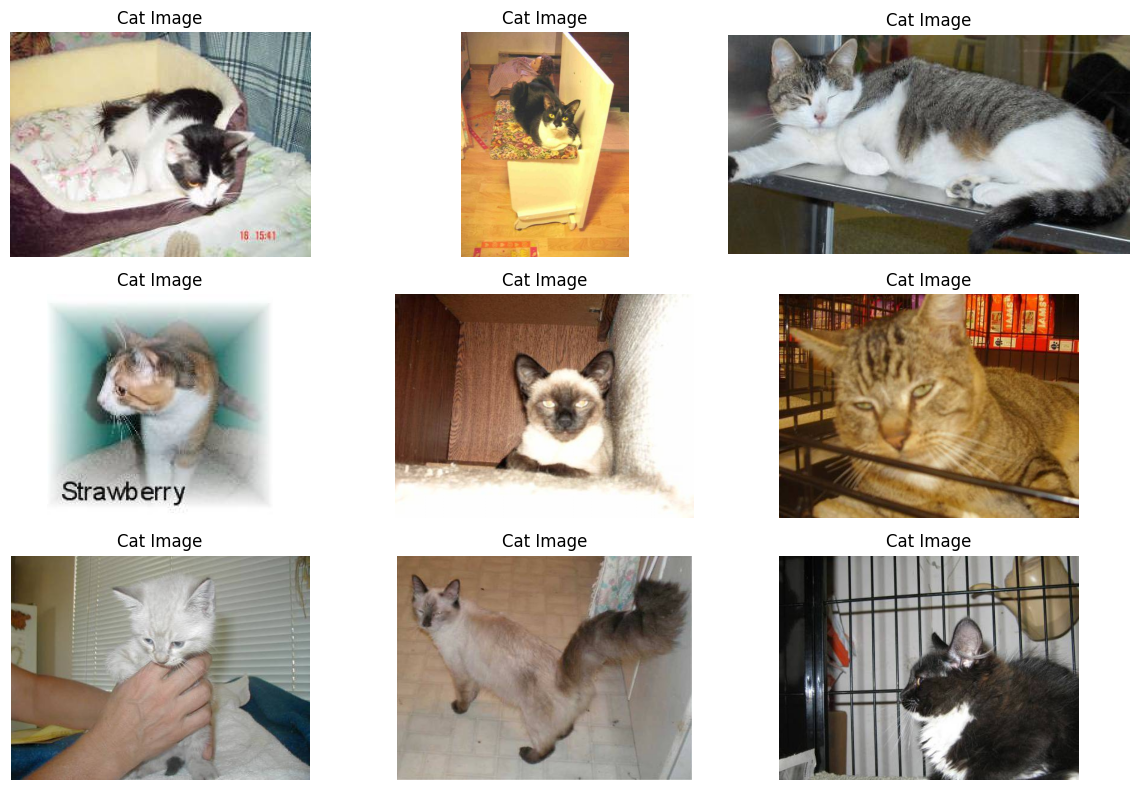

In [ ]:
# Importar y comprobar las 9 primeras imágenes de gatos

# Ruta al directorio que contiene sus datos de imagen
data_dir = "../data/raw"

# Obtener una lista de todos los nombres de archivos de imagen Cat
cats_subfolder = os.path.join(data_dir, "cat")

# Obtener una lista de todos los nombres de archivos de imagen Cat
cats_image_files = os.listdir(cats_subfolder)

# Cargar las nueve primeras imágenes de gato
cats_images = []
for i in range(min(9, len(cats_image_files))):  # Limitar a las imágenes de gato disponibles
    img_path = os.path.join(cats_subfolder, cats_image_files[i])
    img = image.load_img(img_path)
    img_array = image.img_to_array(img)
    img_array /= 255.0
    cats_images.append(img_array)

# Crear una única figura para mostrar todas las imágenes cat
plt.figure(figsize=(12, 8))

for i in range(len(cats_images)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(cats_images[i])
    plt.title('Cat Image')
    plt.axis('off')

# Ajustar el diseño
plt.tight_layout()

# Mostrar las imágenes
plt.show()

#### Crear los conjuntos de datos de imágenes


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Definir algunas reglas para DataGen
train_dir = "../data/raw"
image_size = (200, 200)

datagentrain = ImageDataGenerator()
datagentest = ImageDataGenerator()

# Generación de datos de entrenamiento
train_data = datagentrain.flow_from_directory(
    train_dir,
    target_size = image_size,
    classes = ["dog", "cat"] 
)

# Generación de datos de prueba
test_data = datagentest.flow_from_directory(
    train_dir,
    target_size = image_size,
    classes = ["test"] 
)

Found 25000 images belonging to 2 classes.


Found 12500 images belonging to 1 classes.


#### Entrenar al modelo

In [ ]:
# Mover los datos a través de la red neuronal
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten

model = Sequential()
model.add(Conv2D(input_shape = (224,224,3), filters = 64, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))

# Mover los datos por las capas densas
model.add(Flatten())
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 2, activation = "softmax"))

In [ ]:
# Compilar el modelo con Adam 
from keras.optimizers import Adam

# Compilar el modelo antes del entrenamiento
model.compile(loss = keras.losses.categorical_crossentropy, optimizer = Adam(learning_rate = 0.001), metrics = ["accuracy"])

In [ ]:
# Entrenar el modelo
model.fit(train_data, epochs = 1)

782/782 [==============================] - 3686s 5s/step - loss: 14.4442 - accuracy: 0.4970


#### Guardar nuestro modelo para utilizarlo más tarde

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("../models/vgg16_1.h5", monitor = "val_accuracy", verbose = 1, save_best_only = True, save_weights_only = False, mode = "auto")
early = EarlyStopping(monitor = "val_accuracy", patience = 3, verbose = 1, mode = "auto")
hist = model.fit(train_data, steps_per_epoch = 100, validation_data = test_data, validation_steps = 10, epochs = 3, callbacks = [checkpoint, early])

Epoch 1/3


100/100 [==============================] - ETA: 0s - loss: 0.6932 - accuracy: 0.4941
Epoch 1: val_accuracy improved from -inf to 1.00000, saving model to /workspaces/ImageClassifier/models/vgg16_1.h5


/home/vscode/.local/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


100/100 [==============================] - 483s 5s/step - loss: 0.6932 - accuracy: 0.4941 - val_loss: 1.3863 - val_accuracy: 1.0000
Epoch 2/3
100/100 [==============================] - ETA: 0s - loss: 0.6933 - accuracy: 0.5031
Epoch 2: val_accuracy did not improve from 1.00000
100/100 [==============================] - 481s 5s/step - loss: 0.6933 - accuracy: 0.5031 - val_loss: 1.3863 - val_accuracy: 1.0000
Epoch 3/3
100/100 [==============================] - ETA: 0s - loss: 0.6932 - accuracy: 0.5056
Epoch 3: val_accuracy did not improve from 1.00000
100/100 [==============================] - 484s 5s/step - loss: 0.6932 - accuracy: 0.5056 - val_loss: 1.3863 - val_accuracy: 1.0000


#### Debido a las limitaciones de espacio de GitHub, el modelo no estará dentro de la carpeta models
##### Lo mismo con las fotos originales, no están en el repo

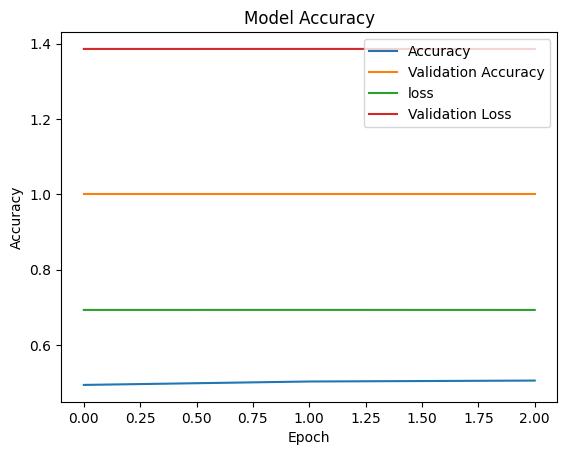

In [ ]:
# Comprobar la exactitud de los datos

# Trazar los resultados
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])

# Configurar el diseño del gráfico
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy", "Validation Accuracy", "Loss", "Validation Loss"])

# Trazar
plt.show()

### Intenta predecir las imágenes

1/1 [==============================] - 0s 154ms/step
cat


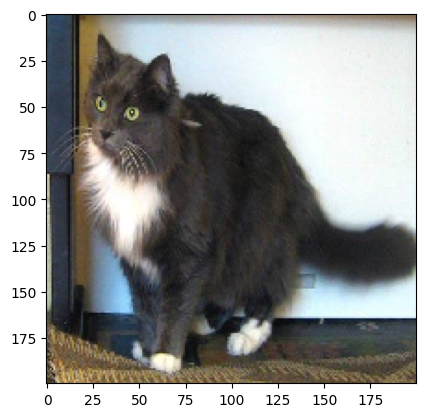

In [ ]:
from keras.preprocessing import image
from keras.models import load_model

img = image.load_img("../data/raw/test/9.jpg", target_size = (200, 200))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis = 0)
saved_model = load_model("../models/vgg16_1.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("cat")
else:
    print("dog")